In [1]:
import pandas as pd 
import numpy as np
import math
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
dataframe = pd.read_csv('/home/ruben/Fundamentos-de-Analisis-de-DAtos-I/Practica/Melbourne_housing_FULL.csv')
import scipy.stats as ss
import matplotlib.pyplot as plot
import seaborn as sb
from seaborn import kdeplot
def quartile_skew(x):
  q = x.quantile([.25, .50, .75]) 
  return ((q[0.75] - q[0.5]) - (q[0.5] - q[0.25])) / (q[0.75] - q[0.25])


def mostrar_analisis_var_cuantitativas(data):
    #calcular coeficiente de variacion
 datos_variable=pd.DataFrame([{"coeficiente de Variacion":(data.std()/data.mean())*100,\
                 "rango de la variable":data.max() - data.min(),
                 "rango intercuartilico":data.quantile(0.75) - data.quantile(0.25),
                 "coeficiente de asimetria":quartile_skew(data)}])
 return(datos_variable)

def mostrar_graf_variables_continuas(df_data,column):
    sb.set_theme(style="whitegrid")
    fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
    sb.histplot(data=df_data,x=column,ax=ax1)
    sb.boxplot(data=df_data,x=column,ax=ax2)
    sb.displot(data=df_data, x=column,kind="kde",rug=True)
    return plot.show()
def mostrar_graf_variables_discretas(df_data,column):
    sb.set_theme(style="whitegrid")
    fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
    sb.boxplot(data=df_data,x=column,ax=ax1)
    sb.countplot(data=df_data,x=column,ax=ax2)
    plot.show()

En primer lugar vamos a realizar una inspeccion ocular del dataset:


In [2]:

dataframe2016=dataframe[dataframe["Date"].str[-4:] =='2016']
dataframe2016.describe()
print("precio medio 2016 ",dataframe2016["Price"].mean())
dataframe2017=dataframe[dataframe["Date"].str[-4:] =='2017']
print("precio medio 2017 ",dataframe2017["Price"].mean())
dataframe2017.describe()
dataframe2018=dataframe[dataframe["Date"].str[-4:] =='2018']
print("precio medio 2018 ",dataframe2018["Price"].mean())
dataframe2017.describe()
dataframe.head()

precio medio 2016  1063226.505338962
precio medio 2017  1051144.058702236
precio medio 2018  1017458.4129014697


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Vemos que tenemos en total 21 variables algunas con aspecto de ser cualitativas y otras cuantitativas. En los proximos puntos iremos analizando las caracteristitcas de las mismas.
Vemos ne primer lugar el tipo de las variables:

In [3]:
dataframe.dtypes


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
aux=pd.DataFrame({"Suburb":pd.value_counts(dataframe['Suburb']),"Method":pd.value_counts(dataframe['Method']),\
                  "Regionname":pd.value_counts(dataframe['Regionname']),"SellerG":pd.value_counts(dataframe['SellerG']),\
                 "Method":pd.value_counts(dataframe['Method']),"CouncilArea":pd.value_counts(dataframe['CouncilArea'])})
aux

,Suburb,Method,Regionname,SellerG,CouncilArea
@Realty,NaN,NaN,NaN,12.0,NaN
A,NaN,NaN,NaN,1.0,NaN
AIME,NaN,NaN,NaN,1.0,NaN
ASL,NaN,NaN,NaN,5.0,NaN
Abbotsford,137.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
iProperty,NaN,NaN,NaN,1.0,NaN
iSell,NaN,NaN,NaN,32.0,NaN
iTRAK,NaN,NaN,NaN,33.0,NaN
viewbank,1.0,NaN,NaN,NaN,NaN


In [5]:
print(dataframe.describe())
aux=pd.DataFrame({"Suburb":dataframe["Suburb"].describe(),"CouncilArea":dataframe["CouncilArea"].describe(),\
                  "Regionname":dataframe["Regionname"].describe(),"SellerG":dataframe["SellerG"].describe(),\
                 "Method":dataframe["Method"].describe()})
aux

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

,Suburb,CouncilArea,Regionname,SellerG,Method
count,34857,34854,34854,34857,34857
unique,351,33,8,388,9
top,Reservoir,Boroondara City Council,Southern Metropolitan,Jellis,S
freq,844,3675,11836,3359,19744


## 3.3 Análisis y resumen numérico de las variables cualitativas del Dataset

para cada una de las variables cualitativas del dataframe comprobaremos sus medidas de centralidad y veremos cuales de ellas tiene sentido analizar



In [6]:
dataframe.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


**Tabla 3.3.1**  
Antes de empezar el analisis de las variables indicar que el coeficiente de asimetria empleado es el de SKEWNESS por tanto para analizar los resultados podemos usar la sigueiente funcion.  
- Si el coeficiente de asimetría es menor que **-1 o mayor que 1**, la distribución de la variable es **extremadamente sesgada**.  
- Si el coeficiente de asimetría se encuentra entre **-1 y -0,5 o entre 0,5 y 1**, la distribución de la variable es **moderadamente sesgada**.  
- Si el coeficiente de asimetría se encuentra entre **-0,5 y 0,5**, la distribución de la variable es **aproximadamente sesgada**.  

### 3.3.1 Analisis de la variable Rooms

Esta variable contiene el número de habitaciones de cada propiedad que hay en la muesta. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 1 a 16 dormitorios, que es el máximo encontrado. La mitad de la muestra tiene tres habitaciones o menos y el 75% de pisos tienen entre 1 y 4 habitaciones.
A continuacion vamos a ver las frecuencias de la variable

In [7]:
pd.value_counts(dataframe['Rooms'])/dataframe["Rooms"].count()


3     0.432739
2     0.239034
4     0.228247
5     0.049832
1     0.042431
6     0.005852
7     0.000918
8     0.000545
10    0.000172
9     0.000115
12    0.000086
16    0.000029
Name: Rooms, dtype: float64

Como se puede ver mas de un 40% de los pisos vendidos tienen 3 dormitorios que es mas del doble del porcentaje del numero de pisos que tiene 2 dormitorios (un 23%) o 4 dormitorios(un 22,8%).

Pasamos a hacer el cálculo de las medidas de dispersión y simetria calcularemos el coficiente de variación, rango, IQR y simtetria:

In [8]:
mostrar_analisis_var_cuantitativas(dataframe["Rooms"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,32.000296,15,2.0,0.0


Como se puede var en la tabla anterio la variable tiene un coeficiente de variacion del 32% con un coeficiente de asimetria igual a 0 por que la variable es simetrica.



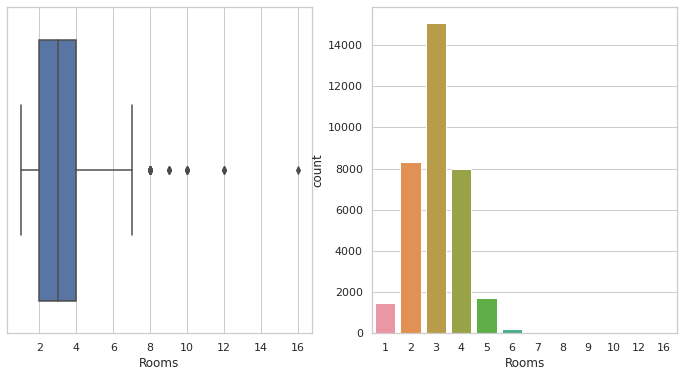

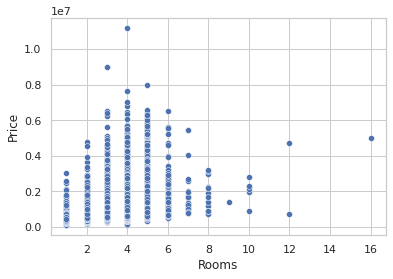

In [9]:
mostrar_graf_variables_discretas(dataframe,"Rooms")
dataframe["Rooms_TR"]=dataframe["Rooms"].apply(np.sqrt)
sb.scatterplot(data=dataframe, x="Rooms", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()



Como ya se habia comprobado numéricamente la variable es muy simetrica aunque se aprecia unos outliers, viviendas de mas de 7 dormitorios que posteriormente veremos que efecto tienen en los modelos.  
A priori no parece necesario tratar de ningún modo esta variable por ser simétrica y los outliers no parecen ser error de muestra.

### 3.3.2 Analisis de la variable Bedroom2
Esta variable contiene el numero de dormitorios de cada propiedad. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 26640 elementos de la muestra.Toma valores discretos en el rango 0 a 30 dormitorios, que es el máximo encontrado. La mitad de la muestra tiene tres dormitorios o menos y el 75% de pisos tienen entre 0 y 4 dormitorios. Estas cifras llaman la atencion ya que **el máximo numero de habitaciones de la variable rooms tenia como maximo 16**, por lo que esos datos puede que estén mal imputados.

In [10]:
pd.value_counts(dataframe['Bedroom2'])/dataframe["Bedroom2"].count()

3.0     0.445983
4.0     0.238288
2.0     0.216854
5.0     0.053566
1.0     0.036261
6.0     0.006306
7.0     0.001126
0.0     0.000638
8.0     0.000488
9.0     0.000188
10.0    0.000150
30.0    0.000038
12.0    0.000038
20.0    0.000038
16.0    0.000038
Name: Bedroom2, dtype: float64

Los resultados son muy parecidos a los obtenidos con la variable Rooms por lo que no es probable que la variable rooms haga referencia tambien a numero de dormitorios y no solo de habitaciones. Como ya ocurria con la variable rooms casi el 89% de las propiedades tiene entre 2 y 4 dormitorios.
Vamos a verificar las medidas de dispersión y asimetria de la variable

In [11]:
mostrar_analisis_var_cuantitativas(dataframe["Bedroom2"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,31.792606,30.0,2.0,0.0


El coeficiente de variacion es muy similar a la variable rooms y con el mismo rango intercuantilico, aunque en este caso el coficiente de asimetria es 0 lo que parece indica que se trata de una distribucion simétrica de los datos. Lo verificaremos con los siguientes diagramas:

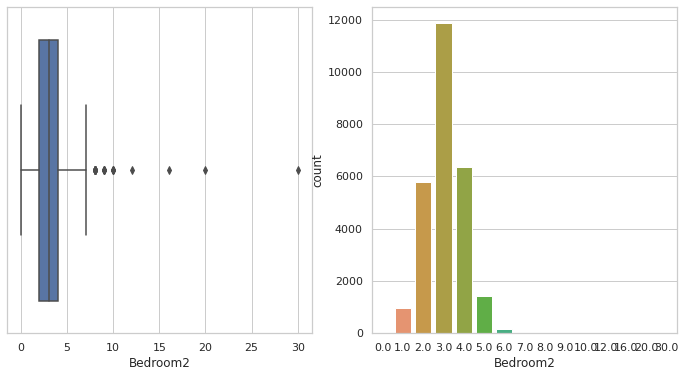

In [12]:
mostrar_graf_variables_discretas(dataframe,"Bedroom2")

como ya se habia comprobado numéricamente la variable es muy simetrica aunque se aprecia unos outliers, viviendas de mas de 7 dormitorios que se deberian eliminar. También habra que seleccionar que variable es de mejor calidad para llevar a cabo el modelo.

En este caso la variable tiene un coeficiente de asimetria 0 y algún outlier que veremos posteriormente como afecta al modelo 

### 3.3.3 Analisis de la variable Distance
La variable Distance indica la distancia al centro del inmbueble y toma como unidad las millas. Como se puede ver en la tabla 3.3.1 esta variable tiene valores en 34856 elementos de la muestra. La variable toma valores entre 0 y 48 millas , el 50% de los pisos de la muestra se encuentran a menos de 10,3 millas del centro de la ciudad y la desviacion tipica es 6,78. 
Calculamos medidas de dispersión y simetriía ya que las de centralidad las hemos visto en la tabla 3.3.1


In [13]:
mostrar_analisis_var_cuantitativas(dataframe["Distance"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,60.696784,48.1,7.6,-0.026316


segun el coeficiente la varibale parece bastante simetrica, vemaos el boxplot para cerciorarnos.
Vemos la distribucion de la variable y posibles outliers

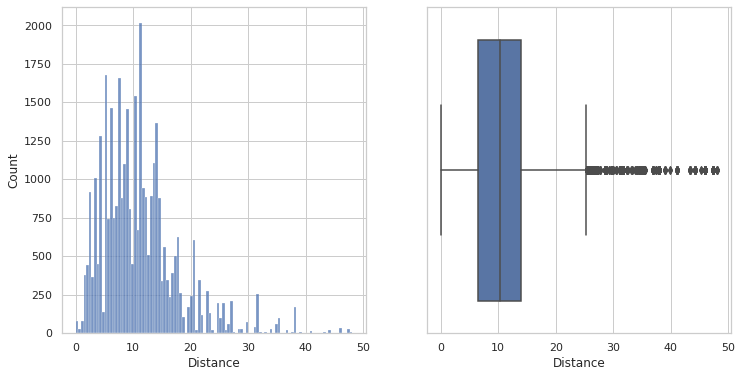

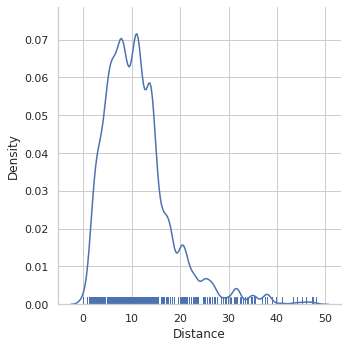

In [14]:
mostrar_graf_variables_continuas(dataframe,"Distance")

¿que se ve aqui?

como indica el coeficiente de asimetria , la variable es ligeramente asimetrica, vamos a intentar que se ajuste mejor a una distribucion normal

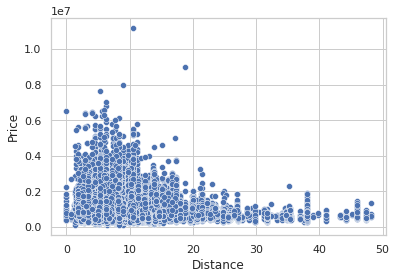

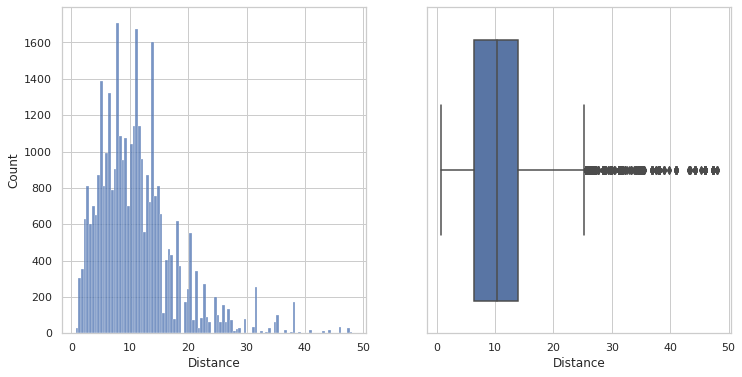

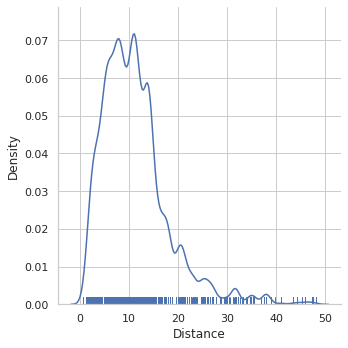

In [15]:
#dataframe=dataframe[dataframe["Distance"].notna()] 



dataframe_filtered=dataframe[dataframe["Distance"] >0]

dataframe_filtered.reset_index(drop=True,inplace=True)
sb.scatterplot(data=dataframe, x="Distance", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()
#dataframe_filtered["Distance_TRA"]=stats.boxcox(dataframe_filtered["Distance"])[0]

dataframe["Distance_TRA"]=dataframe["Distance"].apply(np.sqrt)


#sb.displot(data=dataframe_filtered, x="Distance_TRA",y="Price")
#plot.show()
#dataframe["Distance_SQR"]=dataframe["Distance"].apply(np.sqrt)
#sb.scatterplot(data=dataframe, x="Distance", y="Price")
#plot.show()
mostrar_graf_variables_continuas(dataframe_filtered,"Distance")


¿que hacemos con esto?

¿que hacemos con esto

### 3.3.4 Analisis de la variable Bathrooms

Esta variable indica el número de baños del inmuble.Como se puede ver en la tabla 3.3.1 la variable tiene valor en 26631 elementos de la muestra. Toma valores discretos en el rango 0 a 12 dormitorios. El 75% de pisos tienen entre 0 y 2 baños . A continuacion vamos a ver las frecuencias de la variable:

In [16]:
pd.value_counts(dataframe['Bathroom'])/dataframe["Bathroom"].count()

1.0     0.486989
2.0     0.415456
3.0     0.081897
4.0     0.010101
5.0     0.002891
0.0     0.001727
6.0     0.000601
7.0     0.000150
8.0     0.000113
9.0     0.000038
12.0    0.000038
Name: Bathroom, dtype: float64

Como se puede ver en la tabla anterior el 89% de la muestra tiene igual o menos de dos dormitorios comn una media de 1,6 baños. En la tabla 3.3.1 respecto a las medidas de dispersión podemos ver que la desviacion típica es de 0,72 y en la siguiente tabla vemos mas variables de dispersión y asimetria:

In [17]:
mostrar_analisis_var_cuantitativas(dataframe["Bathroom"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,44.572429,12.0,1.0,-1.0


El coeficiente de variación es del 44% y el coeficiente de asimetria es -1 lo que indica que la variable es moderadamente sesgada, tiene cola a la derecha. comprobaremos esto mismo de manera visual pintando su histograma y boxplot

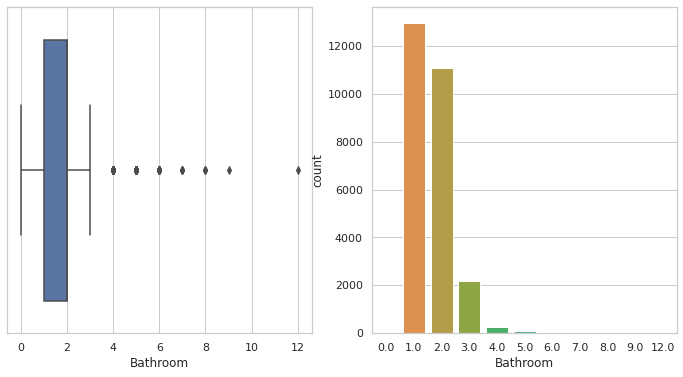

In [18]:
mostrar_graf_variables_discretas(dataframe,"Bathroom")

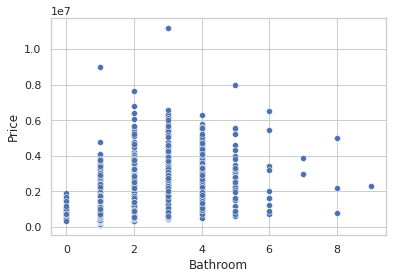

In [19]:
sb.scatterplot(data=dataframe, x="Bathroom", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()

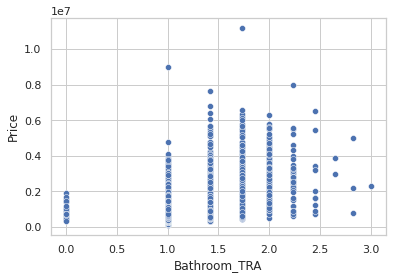

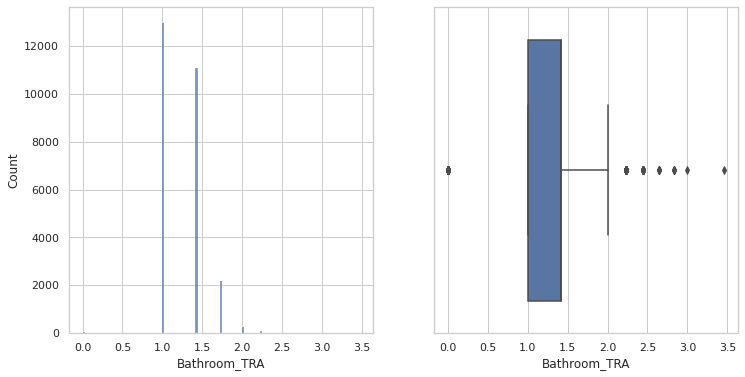

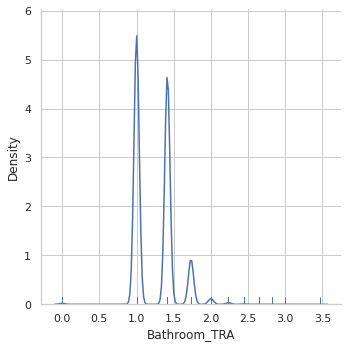

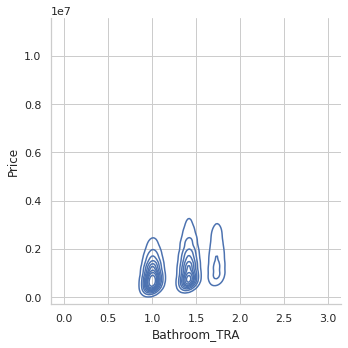

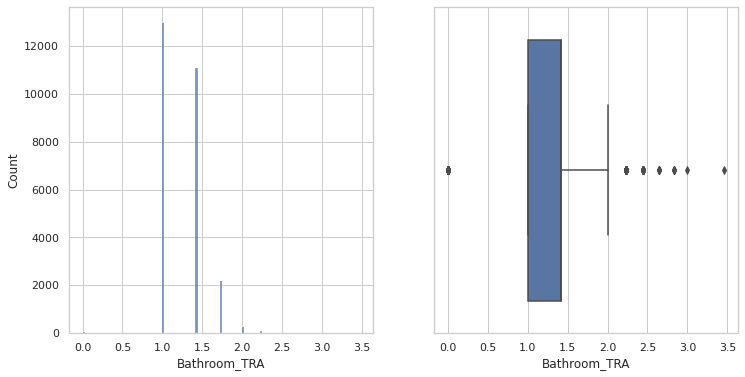

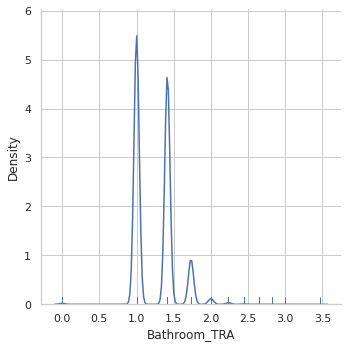

In [20]:
dataframe_filtered=dataframe[(dataframe["Bathroom"]>0) & (dataframe["Bathroom"] is not None)]
dataframe["Bathroom_TRA"]=dataframe["Bathroom"].apply(np.sqrt)

#dataframe["Distance_SQR"]=dataframe["Distance"].apply(np.sqrt)
sb.scatterplot(data=dataframe, x="Bathroom_TRA", y="Price")
mostrar_graf_variables_continuas(dataframe,"Bathroom_TRA")
plot.show()

sb.displot(data=dataframe, x="Bathroom_TRA",y="Price",kind="kde")
plot.show()
#dataframe["Distance_SQR"]=dataframe["Distance"].apply(np.sqrt)
#sb.scatterplot(data=dataframe, x="Distance", y="Price")
#plot.show()
mostrar_graf_variables_continuas(dataframe,"Bathroom_TRA")

NI idea de que hacer con esta variable si es que hay que hacer algo...

### 3.3.5 Analisis de la variable Car

Esta variable contiene el numero de plazas de aparcamiento que tiene asociadas la vivienda. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 26129 de la muestra y toma valores discretos en el rango 0 a 26 plazas de aparcamiento. El 75% de pisos tienen entre 0 y 2 plazas de aparcamiento . A continuacion vamos a ver las frecuencias de la variable:


In [21]:
pd.value_counts(dataframe['Car'])/dataframe["Car"].count()

2.0     0.467450
1.0     0.350721
0.0     0.062421
3.0     0.061464
4.0     0.044433
5.0     0.005779
6.0     0.005358
7.0     0.000957
8.0     0.000880
10.0    0.000230
9.0     0.000115
11.0    0.000077
26.0    0.000038
12.0    0.000038
18.0    0.000038
Name: Car, dtype: float64

como se puede ver casi el 47% de las casas de la muestra tienen dos plaza de aparcamiento y el 81% entre 1 y 2 plazas de aparcamiento.Respecto a las medidas de dispersión, en la tabla 3.3.1 podemos ver que la desviacion típica es de 1.01. En la siguiente tabla vemos mas variables de dispersión y asimetria:

In [22]:
mostrar_analisis_var_cuantitativas(dataframe["Car"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,58.465078,26.0,1.0,-1.0


como se puede ver hay un coeficiente de variación alto y asimetria por la izquierda que verificaremos mejor haciendo algunos diagramas

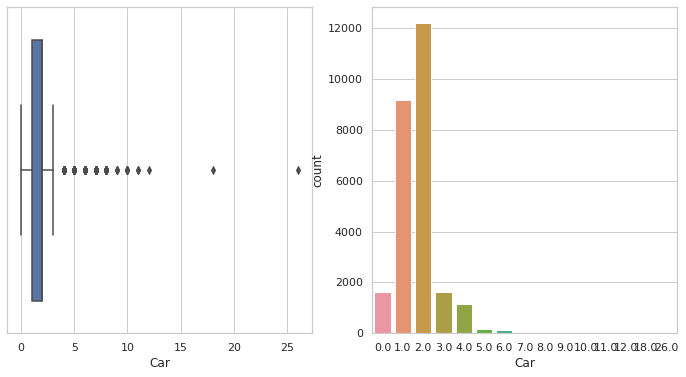

In [23]:
mostrar_graf_variables_discretas(dataframe,"Car")

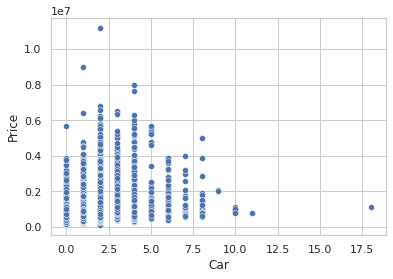

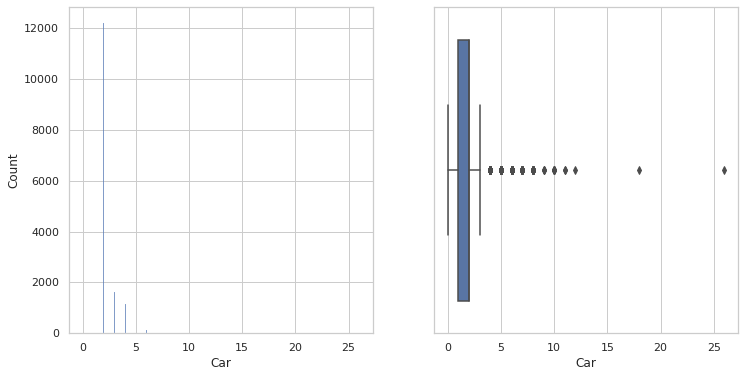

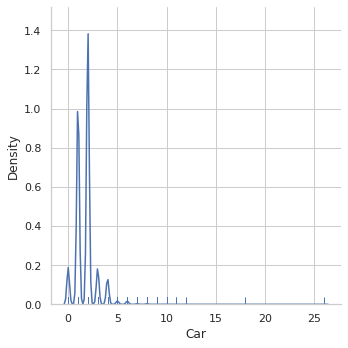

In [24]:
sb.scatterplot(data=dataframe, x="Car", y="Price")
mostrar_graf_variables_continuas(dataframe,"Car")
plot.show()

### 3.3.6 Analisis de la variable Landsize

Esta variable contiene el tamaño del terreno asociado a la vivienda, excluye los metros de la vivienda y está calculada en metros cuadrados. La media de terreno asociado al inmbueble es de  593.598993  El 75% de pisos tienen menos de 670 metros cuadrados de parcela. A continuacion vamos a ver las frecuencias de la variable:

In [25]:
mostrar_analisis_var_cuantitativas(dataframe["Landsize"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,572.582161,433014.0,446.0,-0.331839


la variable es aproximadamente sesgada a la izquierda y con un rango de valores muy amplio.pintamos algunos gráficos para entender mejor la asimietria y la dispersión del a variablable

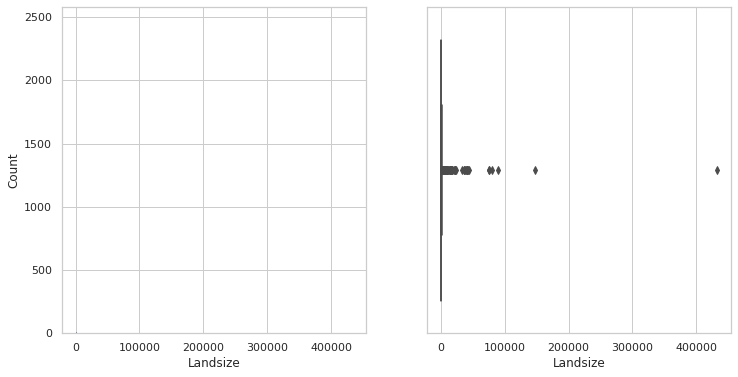

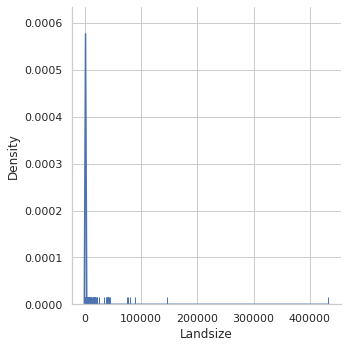

In [26]:
mostrar_graf_variables_continuas(dataframe,"Landsize")

vamos a eliminar el registro superior que está desvirtuando el gráfico para poder analizarlo con mas detalle

registros filtrado =  23


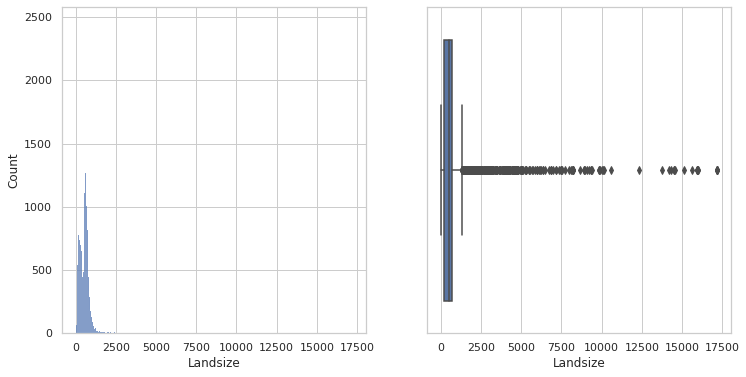

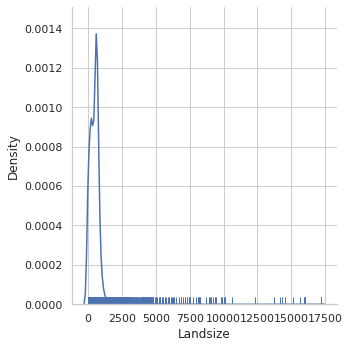

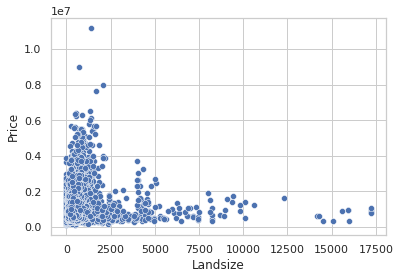

In [27]:
#Eliminamos outliers superiores para poder seguir analizando 
df_filtered=dataframe[dataframe["Landsize"]<20000]
print("registros filtrado = ",(dataframe["Landsize"].count()-df_filtered["Landsize"].count()))
mostrar_graf_variables_continuas(df_filtered,"Landsize")



sb.scatterplot(data=df_filtered, x="Landsize", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()

Continua habiendo outliers que hacen que la variabe sea muy dispersa por lo que la variable es clara condidata a ser transformada

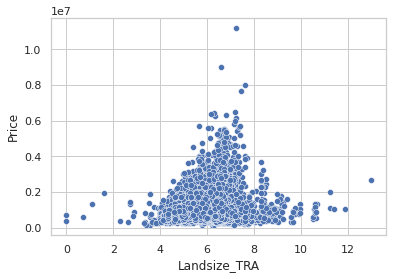

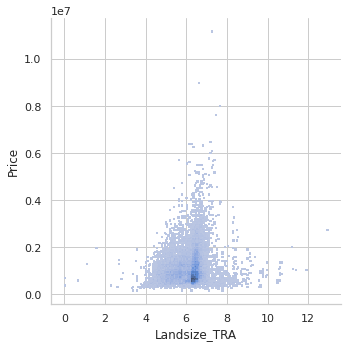

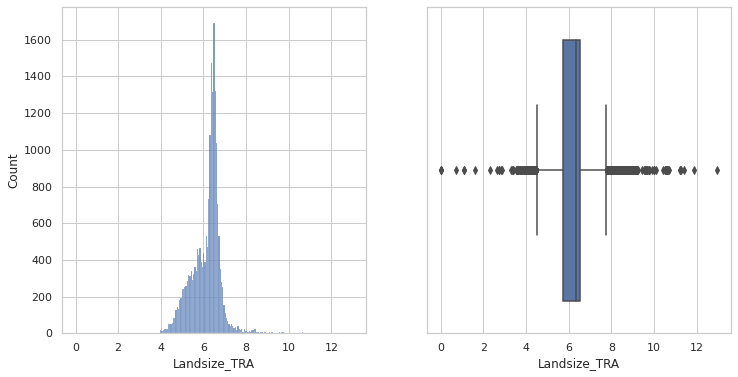

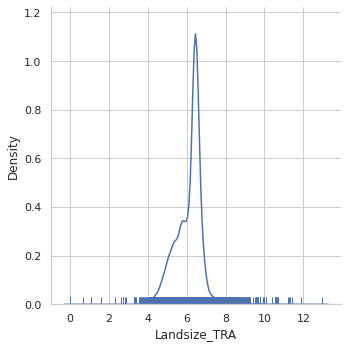

In [28]:
#dataframe=dataframe[dataframe["Distance"].notna()] 

dataframe_filtered=dataframe[(dataframe["Landsize"]>0) ]

#dataframe_filtered.reset_index(drop=True,inplace=True)

#dataframe_filtered["Landsize_TRA"]=stats.boxcox(dataframe_filtered["Distance"])[0]

#dataframe_filtered["Landsize_TRA"]=dataframe_filtered["Landsize"].apply(np.sqrt)
dataframe_filtered["Landsize_TRA"]=np.log(dataframe_filtered["Landsize"])



sb.scatterplot(data=dataframe_filtered, x="Landsize_TRA", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()
#dataframe_filtered['Landsize_TRA'] = np.where(dataframe['Landsize'] >= 40000, 40000, (dataframe['Landsize']//100)*100)
#dataframe_filtered['Landsize_TRA'] = np.where(dataframe_filtered['Landsize_TRA'] <= 70, 70, dataframe_filtered['Landsize_TRA'])


sb.displot(data=dataframe_filtered, x="Landsize_TRA",y="Price")
plot.show()
#dataframe["Distance_SQR"]=dataframe["Distance"].apply(np.sqrt)
#sb.scatterplot(data=dataframe, x="Distance", y="Price")
#plot.show()
mostrar_graf_variables_continuas(dataframe_filtered,"Landsize_TRA")


### 3.3.7 Analisis de la variable BulldingArea

Esta variable contiene el el tamaño del terreno asociado a la vivienda en metros cuadrados. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 13742 elementos de la muestra.La media del tamaño de los inmubles de 160.25640 y toma valores continuos en el rango 0 a 44515 . El 75% de pisos tienen menos de 188.00000 metros cuadrado. A continuacion vamos a ver las medidas de dispersión de la varibale:

In [29]:
mostrar_analisis_var_cuantitativas(dataframe["BuildingArea"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,250.390661,44515.0,86.0,0.209302


como se puede ver la variable tiene asimetria a la derecha, pero en la tabla inicial vimos que la desviación estándar era muy alta para el valor que tomaba la media. Pasamos a comprobar visualmente la simetria

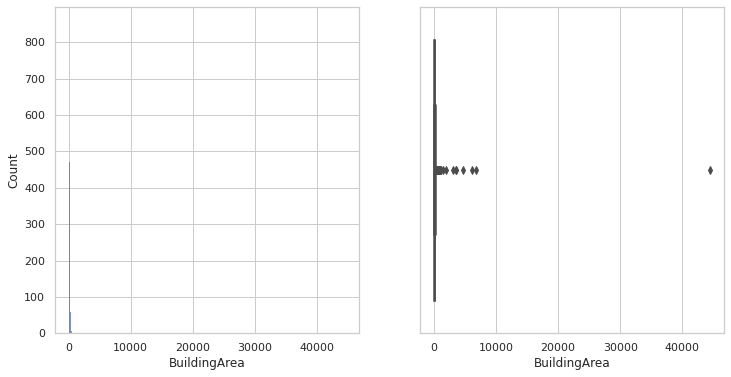

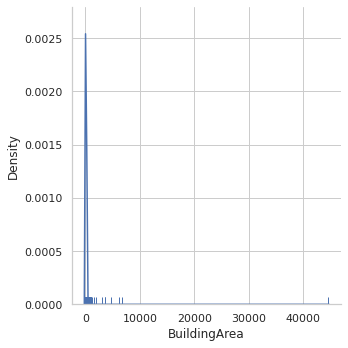

In [30]:
mostrar_graf_variables_continuas(dataframe,"BuildingArea")

como se puede ver hay claramente algún outlier que desvirtua la muestra (ya lo pudimos ver tambien en la tabla 3.1.1 donde la media era de 522 y el maximo era mas de 44000 metros cuadrados de parcela).
Eliinamos el el maximo en cuestión y repiintamos los graficos

registros filtrado =  13


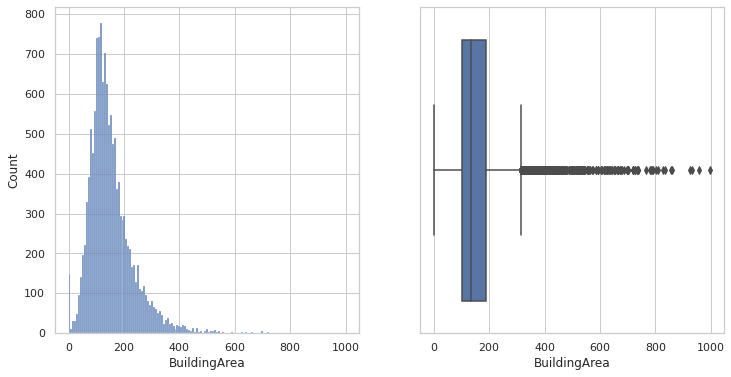

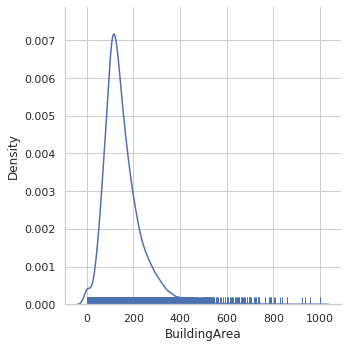

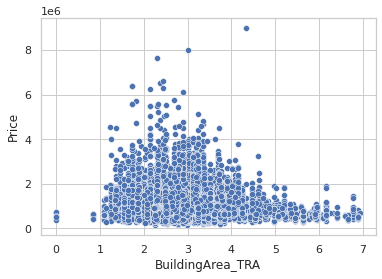

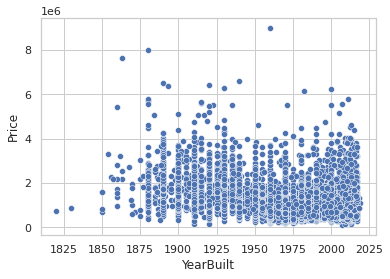

In [31]:
#Eliminamos el maximo y vemos que ocurre
df_filtered=dataframe[dataframe["BuildingArea"]<1000]
print("registros filtrado = ",(dataframe["BuildingArea"].count()-df_filtered["BuildingArea"].count()))
mostrar_graf_variables_continuas(df_filtered,"BuildingArea")
#df_filtered["BuildingArea_TRA"]=np.log(dataframe_filtered["BuildingArea"])
df_filtered["BuildingArea_TRA"]=df_filtered["Distance"].apply(np.sqrt)
sb.scatterplot(data=df_filtered, x="BuildingArea_TRA", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()



df_filtered=dataframe[dataframe["YearBuilt"]>1800]

sb.scatterplot(data=df_filtered, x="YearBuilt", y="Price")
#mostrar_graf_variables_continuas(dataframe_filtered,"Distance_SQR")
plot.show()

Los datos sin ese registro tienen mejor aspecto y parecen muy concentrados. Lo tendremos en cuenta cuando tratemos la variables.

### 3.3.8 Analisis de la variable PropertyCountss

Esta variable contiene el numero de viviendas existentes en el barrio. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34854 y toma valores discretos en el rango 83 a 21650(que es el maximo de viviendas en un bbarrio). El 75% de pisos están en barrios con 10412 viviendas o menos.
A continuacion vamos a ver las frecuencias de la variable:

In [32]:
mostrar_analisis_var_cuantitativas(dataframe["Propertycount"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,58.472938,21567.0,6027.0,0.210884


La variable es aproximadamente sesgada a la derecha , lo comprobaremos visalmente:

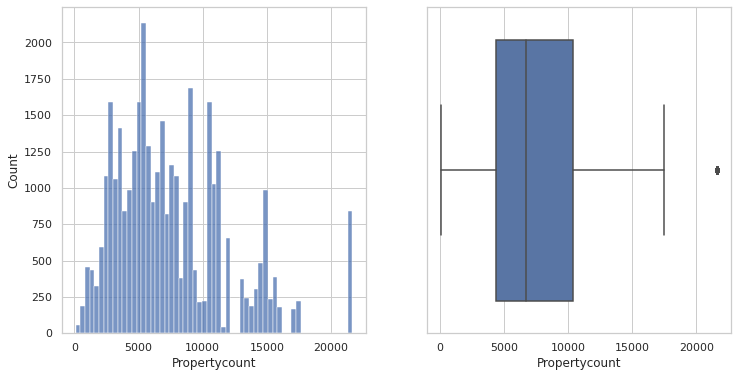

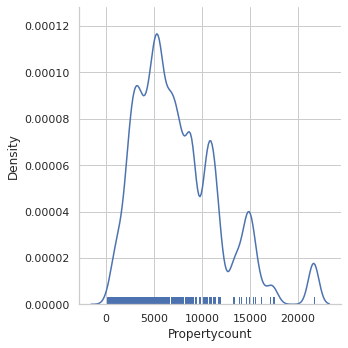

In [33]:
mostrar_graf_variables_continuas(dataframe,"Propertycount")

### 3.3.1 Analisis de la variable Price
ANALIZAR como cambia el tiempo

Meter el algun calculo de lat y long.


```{toctree}
:hidden:
:titlesonly:


markdown
notebooks
notebooks
```
